In [1]:
#importing modules
import pandas as pd
import re
from datetime import datetime
from urllib.parse import urlparse

In [2]:
#file path
history_file_in = 'data/pkl/history_2022-08-01T10:29:40.132765.pkl'
url_file_in = 'data/pkl/urls_2022-08-01T10:29:40.862116.pkl'

#load pkl
history_tag_df = pd.read_pickle(history_file_in)
url_df = pd.read_pickle(url_file_in)

stackoverflow_tag_df = pd.read_csv('QueryResults.csv')

url_id_df = url_df.rename(columns = {'id': 'url_id'})

both_df = history_tag_df.merge(url_id_df)
both_df

,id,user_id,search,url_id,metadata,enter_time,exit_time,visit_count,title,host_and_path,created_at
0,4da31dd7-4dad-4ee2-be4a-201c2a5a28fa,f8423d94-994e-4886-b04c-b5546afa2e16,None,4c2f7fb3-23ec-4291-8d67-dcbfe076d4c1,None,2022-06-23T18:23:36.227+00:00,2022-06-23T18:23:37.82+00:00,2,100days/day1.ts at main · ohanlon/100days · Gi...,github.com/ohanlon/100days/blob/main/day1/day1.ts,2022-06-25T15:25:17.140027+00:00
1,94c29260-364c-4f99-a8b6-cb5f8cc4a3d8,f8423d94-994e-4886-b04c-b5546afa2e16,None,4c2f7fb3-23ec-4291-8d67-dcbfe076d4c1,None,2022-06-23T18:23:36.227+00:00,2022-06-23T18:23:37.82+00:00,2,100days/day1.ts at main · ohanlon/100days · Gi...,github.com/ohanlon/100days/blob/main/day1/day1.ts,2022-06-25T15:25:17.140027+00:00
2,9b5e0799-d9b3-4196-be98-50e669949cae,f8423d94-994e-4886-b04c-b5546afa2e16,None,4c2f7fb3-23ec-4291-8d67-dcbfe076d4c1,None,2022-06-23T18:23:36.227+00:00,2022-06-23T18:23:37.82+00:00,2,100days/day1.ts at main · ohanlon/100days · Gi...,github.com/ohanlon/100days/blob/main/day1/day1.ts,2022-06-25T15:25:17.140027+00:00
3,7501c7c8-0ec8-485e-8bc2-ad6ca2d108e4,f8423d94-994e-4886-b04c-b5546afa2e16,None,3eb946c7-f264-4d41-b7a1-7186b61203ff,None,2022-06-25T14:47:59.722+00:00,2022-06-25T14:48:09.278+00:00,1,"Stack Overflow - Where Developers Learn, Share...",stackoverflow.com,2022-05-13T21:17:25.88585+00:00
4,fb5b3ae1-3a81-4f16-a8e2-7816a8da6577,f8423d94-994e-4886-b04c-b5546afa2e16,None,3eb946c7-f264-4d41-b7a1-7186b61203ff,None,2022-05-30T21:45:30.201+00:00,2022-05-30T22:42:03.814+00:00,1,"Stack Overflow - Where Developers Learn, Share...",stackoverflow.com,2022-05-13T21:17:25.88585+00:00
...,...,...,...,...,...,...,...,...,...,...,...
4046,9737ac21-3b23-4c3b-b10f-af7c0324e9eb,cb160a60-465a-4daf-85f0-43d615ee8f2a,None,2e15a32d-40d4-4a82-b5c2-824146d27079,None,2022-07-28T11:44:01.988+00:00,2022-07-28T11:44:18.844+00:00,1,Effing Controller - YouTube,youtube.com/c/effingcontroller,2022-07-30T10:53:07.280286+00:00
4047,167f213d-88f2-4125-9f31-0f950d531517,cb160a60-465a-4daf-85f0-43d615ee8f2a,None,12a4d581-cd8b-43d6-8d6b-b4f069b1d70f,None,2022-07-28T11:44:18.844+00:00,2022-07-28T11:44:42.691+00:00,1,Effing Controller - YouTube,youtube.com/c/effingcontroller/playlists,2022-07-30T10:53:07.280286+00:00
4048,3e536789-3417-47fe-9096-dd34840bd76d,cb160a60-465a-4daf-85f0-43d615ee8f2a,None,7d71265f-af24-4dcf-9823-1d620a773479,None,2022-07-29T10:23:00.224+00:00,2022-07-29T10:23:04.719+00:00,1,GitHub - VitorVilela7/SA1-Root: Project for ac...,github.com/VitorVilela7/SA1-Root,2022-07-30T10:53:07.280286+00:00
4049,1d051f90-59fc-437b-9c9e-13125bf9b2e0,cb160a60-465a-4daf-85f0-43d615ee8f2a,None,67290d53-a538-4954-9727-67abd0e902c0,None,2022-07-29T10:24:54.403+00:00,2022-07-29T10:25:57.277+00:00,1,GitHub - VitorVilela7/SMW-SA1-Pack: SA-1 Pack ...,github.com/VitorVilela7/SMW-SA1-Pack,2022-07-30T10:53:07.280286+00:00


In [3]:
websites = []


for first, second in both_df.iterrows():
   # print(second.host_and_path)
    websites.append(urlparse(second.host_and_path).path.split('.')[0])
    
data = {
    'website': websites
}


website_df = pd.DataFrame(data)

In [4]:
#initialize empty lists to later load them into dataframes
time_spent = []
tags = []
titles = []
urls = []
url_tags = []
user_id = []

#second is what important - able to access title and time in what I loaded 
for first, second in both_df.iterrows():
    
    
    urls.append(urlparse(second.host_and_path).path.split('.')[0])
    
    titles.append(second.title)
    
    
    #split title by spaces
    tags.append(str(second.title).split())
    #refragmenting time forvdatetime
    enter = (datetime(
        int(second.enter_time[0:4]),
        int(second.enter_time[5:7]),
        int(second.enter_time[8:10]),
        int(second.enter_time[11:13]),
        int(second.enter_time[14:16]),
        int(second.enter_time[17:19])
    ))
        
    
                          
    exit = (datetime(
        int(second.exit_time[0:4]),
        int(second.exit_time[5:7]),
        int(second.exit_time[8:10]),
        int(second.exit_time[11:13]),
        int(second.exit_time[14:16]),
        int(second.exit_time[17:19])
    ))
        
    #calculating time spent, timestamp() for seconds / 60 / 60 for hours
    time_spent.append(((exit.timestamp() - enter.timestamp()) / 60 ) / 60)
    
    user_id.append(second.user_id)
    
# data for the dataframe
data = {
    'user_id': user_id,
    'tags': tags,
    'title': titles,
    'url': urls,
    'time_spent': time_spent,
}

#creating dataframe with title and time_spent
time_df = pd.DataFrame(data)

In [5]:
time_df

,user_id,tags,title,url,time_spent
0,f8423d94-994e-4886-b04c-b5546afa2e16,"[100days/day1.ts, at, main, ·, ohanlon/100days...",100days/day1.ts at main · ohanlon/100days · Gi...,github,0.000278
1,f8423d94-994e-4886-b04c-b5546afa2e16,"[100days/day1.ts, at, main, ·, ohanlon/100days...",100days/day1.ts at main · ohanlon/100days · Gi...,github,0.000278
2,f8423d94-994e-4886-b04c-b5546afa2e16,"[100days/day1.ts, at, main, ·, ohanlon/100days...",100days/day1.ts at main · ohanlon/100days · Gi...,github,0.000278
3,f8423d94-994e-4886-b04c-b5546afa2e16,"[Stack, Overflow, -, Where, Developers, Learn,...","Stack Overflow - Where Developers Learn, Share...",stackoverflow,0.002778
4,f8423d94-994e-4886-b04c-b5546afa2e16,"[Stack, Overflow, -, Where, Developers, Learn,...","Stack Overflow - Where Developers Learn, Share...",stackoverflow,0.942500
...,...,...,...,...,...
4046,cb160a60-465a-4daf-85f0-43d615ee8f2a,"[Effing, Controller, -, YouTube]",Effing Controller - YouTube,youtube,0.004722
4047,cb160a60-465a-4daf-85f0-43d615ee8f2a,"[Effing, Controller, -, YouTube]",Effing Controller - YouTube,youtube,0.006667
4048,cb160a60-465a-4daf-85f0-43d615ee8f2a,"[GitHub, -, VitorVilela7/SA1-Root:, Project, f...",GitHub - VitorVilela7/SA1-Root: Project for ac...,github,0.001111
4049,cb160a60-465a-4daf-85f0-43d615ee8f2a,"[GitHub, -, VitorVilela7/SMW-SA1-Pack:, SA-1, ...",GitHub - VitorVilela7/SMW-SA1-Pack: SA-1 Pack ...,github,0.017500


In [6]:
import re

time_spent = []
tags = []
titles = []
urls = []
user_id = []

for first, second in time_df.iterrows():
    for tag in str(second.tags).split(','):
        titles.append(second.title)
        urls.append(second.url)
        time_spent.append(second.time_spent)
        cleanString = re.sub('\W+','', tag)
        tags.append(cleanString.lower())
        user_id.append(second.user_id)
        
data = {
    'user_id': user_id,
    'tag': tags,
    'title': titles,
    'url': urls,
    'time_spent': time_spent
}


tag_df = pd.DataFrame(data)
tag_df

,user_id,tag,title,url,time_spent
0,f8423d94-994e-4886-b04c-b5546afa2e16,100daysday1ts,100days/day1.ts at main · ohanlon/100days · Gi...,github,0.000278
1,f8423d94-994e-4886-b04c-b5546afa2e16,at,100days/day1.ts at main · ohanlon/100days · Gi...,github,0.000278
2,f8423d94-994e-4886-b04c-b5546afa2e16,main,100days/day1.ts at main · ohanlon/100days · Gi...,github,0.000278
3,f8423d94-994e-4886-b04c-b5546afa2e16,,100days/day1.ts at main · ohanlon/100days · Gi...,github,0.000278
4,f8423d94-994e-4886-b04c-b5546afa2e16,ohanlon100days,100days/day1.ts at main · ohanlon/100days · Gi...,github,0.000278
...,...,...,...,...,...
32299,cb160a60-465a-4daf-85f0-43d615ee8f2a,sa1,GitHub - VitorVilela7/SMW-SA1-Pack: SA-1 Pack ...,github,0.017500
32300,cb160a60-465a-4daf-85f0-43d615ee8f2a,in,GitHub - VitorVilela7/SMW-SA1-Pack: SA-1 Pack ...,github,0.017500
32301,cb160a60-465a-4daf-85f0-43d615ee8f2a,smw,GitHub - VitorVilela7/SMW-SA1-Pack: SA-1 Pack ...,github,0.017500
32302,cb160a60-465a-4daf-85f0-43d615ee8f2a,hacks,GitHub - VitorVilela7/SMW-SA1-Pack: SA-1 Pack ...,github,0.017500


In [7]:
tags_in = []
time_in = []
user_id = []


for tag in stackoverflow_tag_df.TagName.head(2000):
    count = tag_df["tag"].str.contains(tag, regex=False).sum()
    if (count>0) and tag not in websites:
        tags_in.append(tag)
        time_in.append(tag_df[tag_df['tag'] == tag]['time_spent'].sum())
        user_id.append(tag_df[tag_df['tag'] == tag]['user_id'])

data = {
     'user_id': user_id,
     'tag': tags_in,
     'time_spent': time_in
}

sorted_df = pd.DataFrame(data)

In [11]:
sorted_df = sorted_df.sort_values(by = 'time_spent').tail(20)

In [12]:
sorted_df

,user_id,tag,time_spent
291,31508 bdc174d6-f257-4ede-9599-fffd631b10ca ...,task,16.296389
93,6430 f8423d94-994e-4886-b04c-b5546afa2e16 6...,exception,16.455000
118,4722 bdc174d6-f257-4ede-9599-fffd631b10ca ...,video,17.584722
174,4550 bdc174d6-f257-4ede-9599-fffd631b10ca ...,nlp,18.005833
199,17860 f8423d94-994e-4886-b04c-b5546afa2e16 ...,statistics,18.701667
5,845 f8423d94-994e-4886-b04c-b5546afa2e16 ...,html,20.858056
103,10644 f8423d94-994e-4886-b04c-b5546afa2e16 ...,select,21.085278
155,31 f8423d94-994e-4886-b04c-b5546afa2e16 ...,build,24.364444
187,1430 329bdf0c-f696-4a05-9e4e-8d47822db499 1...,scope,34.140000
25,112 f8423d94-994e-4886-b04c-b5546afa2e16 ...,typescript,34.920278


In [128]:
urls = []
time_spent = []

for first, second in time_df.iterrows():
        urls.append(second.url)
        time_spent.append(time_df[time_df['url'] == second.url]['time_spent'].sum())
        
data = {
    'url': urls,
    'time_spent': time_spent
}

url_time_df = pd.DataFrame(data).drop_duplicates().sort_values(by = 'time_spent').tail(20)

<AxesSubplot:xlabel='url'>

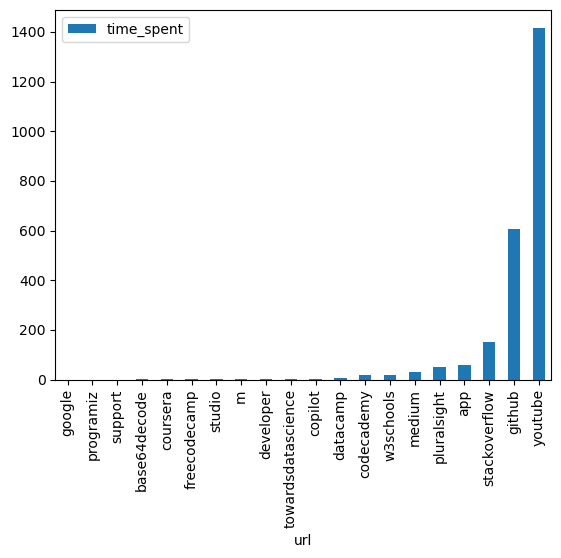

In [129]:
url_time_df.plot.bar(x = 'url', y = 'time_spent')

<AxesSubplot:xlabel='tag'>

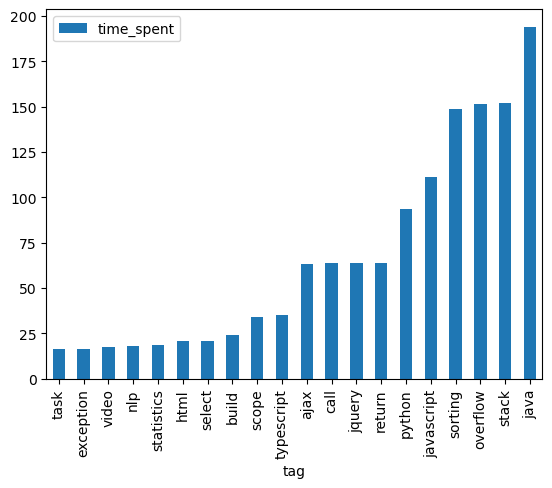

In [130]:
sorted_df.plot.bar(x = 'tag', y = 'time_spent')